<a href="https://colab.research.google.com/github/abel-keya/Moringa_Data_Science_Core_W4_Independent_Project_Abel_Keya/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_Abel_Keya_Cluster_Sampling_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the libraries we will need 

# Let's start by importing the necessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling  as pp
import seaborn as sns
# Set the styles of all graphs to Seaborn one
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans
# Importing Matplotlib
#
import matplotlib.pyplot as plt

In [0]:
AutolibDatasetGlossary
#DESCRIPTION
#State Employee Pay
#SUMMARY
#This dataset is a listing of all current state employees excluding sworn law enforcement officers. Current employees are defined as employees paid in the last 30 days. The following fields are included in the dataset: Agency, Agency Division, Employee Name, Position Title, Period Pay Rate, and YTD Gross Pay. This list is updated on a weekly basis.


urlx= "http://bit.ly/DSCoreAutolibDatasetGlossary"
Glossary=pd.read_excel(urlx)
Glossary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [3]:
#AutolibDataset
#DESCRIPTION
#AutolibDataset
#SUMMARY
#This dataset contains information of the Autolib electric car-sharing service company 
url= "http://bit.ly/DSCoreAutolibDataset"
Autolib=pd.read_csv(url)
Autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [0]:
#pandas_profiling.ProfileReport(Autolib,plot={'histogram': {'bins': 8}}, style={'full_width':False})
#

In [5]:
# Getting to know more about the dataset by accessing its information
# 
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


DATA CLEANING

Cleaning our Dataset

In [6]:
Autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


Accuracy 

In [0]:
# Checking if there is any missing value across each column
Autolib.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [0]:
# Checking how many missing values there are across each column
# 
Autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [0]:
# Or we can do a quick check to see if we have any missing values at all
# 
print(Autolib.isnull().values.any())

False


In [0]:
# We might also want to get a total count of missing values
print(Autolib.isnull().sum().sum())

0


Consitency

In [0]:
#Duplicates are data points that are repeated in your dataset. 
# These should be simply removed.
Autolib.duplicated()
df1=Autolib.duplicated()
df1



0        False
1        False
2        False
3        False
4        False
         ...  
16080    False
16081    False
16082    False
16083    False
16084    False
Length: 16085, dtype: bool

In [0]:
df1.sum()

0

Uniformity

In [7]:
#Removing space between column names
Autolib.columns = Autolib.columns.str.replace(' ', '').str.replace('_', '')
Autolib

,Postalcode,date,ndailydatapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Utilibtakensum,Utilibreturnedsum,Utilib14takensum,Utilib14returnedsum,Slotsfreedsum,Slotstakensum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [8]:
pip install pandas-profiling

In [0]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
Autolib['Postalcode'] = lb_make.fit_transform(Autolib['Postalcode'])
Autolib['date'] = lb_make.fit_transform(Autolib['date'])
Autolib['daytype'] = lb_make.fit_transform(Autolib['daytype'])

In [13]:
autolibfinal=Autolib[['Postalcode','date','ndailydatapoints','dayOfWeek','daytype','BlueCarstakensum','BlueCarsreturnedsum','Slotsfreedsum','Slotstakensum']]
autolibfinal

,Postalcode,date,ndailydatapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Slotsfreedsum,Slotstakensum
0,0,0,1440,0,0,110,103,22,20
1,0,11,1438,1,0,98,94,23,22
2,0,22,1439,2,0,138,139,27,27
3,0,25,1320,3,0,104,104,25,21
4,0,26,1440,4,0,114,117,18,20
...,...,...,...,...,...,...,...,...,...
16080,103,143,1440,4,0,15,10,0,0
16081,103,144,1440,5,1,19,19,0,0
16082,103,145,1440,6,1,33,35,0,0
16083,103,146,1440,0,0,11,14,0,0


In [10]:
autolibfinal['Postalcode'].unique

<bound method Series.unique of 0        75001
1        75001
2        75001
3        75001
4        75001
         ...  
16080    95880
16081    95880
16082    95880
16083    95880
16084    95880
Name: Postalcode, Length: 16085, dtype: int64>

OUTLIERS


In [0]:
# Checking for Outliers
#
col_names = ['Postalcode','date','ndailydatapoints','dayOfWeek','daytype','BlueCarstakensum','BlueCarsreturnedsum','Slotsfreedsum','Slotstakensum']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))
for i, col_val in enumerate(col_names):

    sns.boxplot(y=autolibfinal[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [0]:
#Percentile based outlier removal
#filter out outliers based on fixed percentile values.
def percentile_based_outlier(autolibfinal, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(autolibfinal, [diff, 100 - diff])
    return (autolibfinal < minval) | (autolibfinal> maxval)

col_names = ['Postalcode','date','ndailydatapoints','dayOfWeek','daytype','BlueCarstakensum','BlueCarsreturnedsum','Slotsfreedsum','Slotstakensum']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = autolibfinal[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

*EXPLORATORY DATA ANALYSIS**


1.UNIVARIATE DATA ANALYSIS

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


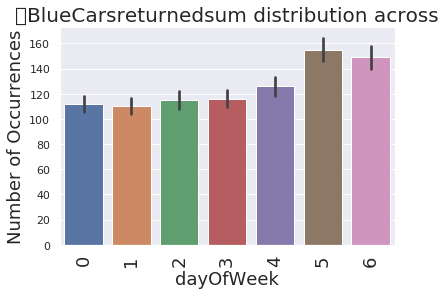

In [25]:
import matplotlib.pyplot as plt
% matplotlib inline
# Create a scatter plot using the 'Agency' and 'EmployeeName'
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
autolibfinal_sum = autolibfinal['BlueCarsreturnedsum'].sum()
sns.set(style="darkgrid")
sns.barplot(autolibfinal['dayOfWeek'], autolibfinal['BlueCarsreturnedsum'], alpha=1.0)
plt.title('	BlueCarsreturnedsum distribution across',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('dayOfWeek', fontsize=18)
plt.figsize=(40,150)
plt.xticks(rotation=90,fontsize=18)
plt.show()


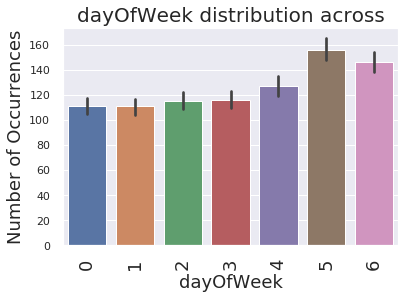

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline
# Create a scatter plot using the 'Agency' and 'EmployeeName'
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
autolibfinal_sum = autolibfinal['BlueCarstakensum'].sum()
sns.set(style="darkgrid")
sns.barplot(autolibfinal['dayOfWeek'], autolibfinal['BlueCarstakensum'], alpha=1.0)
plt.title('dayOfWeek distribution across',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('dayOfWeek', fontsize=18)
plt.figsize=(40,150)
plt.xticks(rotation=90,fontsize=18)
plt.show()

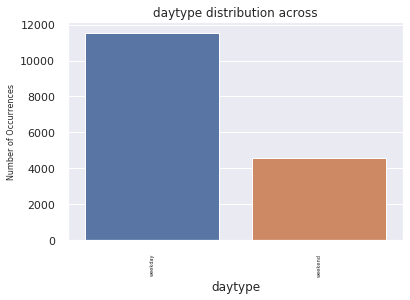

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline
# Create a scatter plot using the 'Agency' and 'EmployeeName'
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
autolibfinal_count = autolibfinal['daytype'].value_counts()
sns.set(style="darkgrid")
sns.barplot(autolibfinal_count.index, autolibfinal_count.values, alpha=1.0)
plt.title('daytype distribution across',fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=8)
plt.xlabel('daytype', fontsize=12)
plt.figsize=(20,80)
plt.xticks(rotation=90,fontsize=5)
plt.show()

In [0]:
# Univariate Histograms
from matplotlib import pyplot
names = ['Postalcode','date','ndailydatapoints','dayOfWeek','daytype','BlueCarstakensum','BlueCarsreturnedsum','Slotsfreedsum','Slotstakensum']
autolibfinal.hist(figsize=(15,30))
pyplot.show()

2.1.BIVARIATE AND MULTIVARIATE DATA ANALYSIS USING PANDAS PROFILING

In [0]:
pp.ProfileReport(Autolib)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,6


**SAMPLING **

In [0]:
#SAMPLE SIZE DETERMINATION
#(i)population size. 
# Determining the size
autolibfinal.shape

(16085, 9)

In [0]:
#(ii)Determine the margin of error
#Margin of error, also referred to as "confidence interval," refers to the amount of error you wish to allow in your results.[2]
#The margin of error is a percentage the indicates how close your sample results will be to the true value of the overall population discussed in the study.
#Smaller margin of errors will result in more accurate answers, but choosing a smaller margin of error will also require a larger sample.
#in this case the margin of error will be taken as +/- 5%

In [0]:
#(iii)Set the confidence level
#This value measures your degree of certainty regarding how well a sample represents the overall population within your chosen margin of error.
#In this case a confidence level of 95% which  ascertains that the results accurately fall within the  chosen margin of error of  +/- 5%

In [0]:
#(iv)Specify your standard of deviation.
# The standard of deviation indicates how much variation in the data.
#due to the skewness in the data, a standard deviation of 50%(0.5) will be used
#

In [0]:
#(v)Find the Z-score
#The Z-score is a constant value automatically set based on your confidence level. 
#It indicates the "standard normal score," or the number of standard deviations between any selected value and the average/mean of the population.
#95% confidence => 1.96 z-score

Sample Size

Sample Size = [z2 * p(1-p)] / e2 / 1 + [z2 * p(1-p)] / e2 * N]
N = population size
z = z-score
e = margin of error
p = standard of deviation
Sample Size = [z2 * p(1-p)] / e2 / 1 + [z2 * p(1-p)] / e2 * N]
= [2.582 * 0.5(1-0.5)] / 0.05 Squared / 1 + [2.582 * 0.5(1-0.5)] / 0.05 Squared * 16085]
= [6.6564 * 0.25] / 0.0025 / 1 + [6.6564 * 0.25] / 40.2125]
= 665 / 1.041
=638

Sample Data

In [0]:
autolibfinal_sample = autolibfinal.sample(n = 638, replace="False")
print(autolibfinal_sample)
autolibfinal_sample.

       Postalcode       date  ...  Slotsfreedsum  Slotstakensum
4410        92000  2/14/2018  ...              0              0
15198       94500  2/19/2018  ...              0              0
9801        92700  6/10/2018  ...              0              0
6497        92230  4/18/2018  ...              0              1
14120       94160   3/7/2018  ...              1              1
...           ...        ...  ...            ...            ...
5671        92170   3/3/2018  ...              0              0
10486       93150  2/24/2018  ...              0              0
14046       94150   6/8/2018  ...              3              3
5613        92170   1/1/2018  ...              0              0
4957        92120   5/8/2018  ...              0              0

[638 rows x 9 columns]


Sample Statistics obtained through Pandas Profiling

In [0]:
pp.ProfileReport(autolibfinal_sample)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,10
Number of observations,638
Total Missing (%),0.0%
Total size in memory,50.0 KiB
Average record size in memory,80.2 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,3
